In [2]:
import pandas as pd

In [3]:
# data = pd.read_csv('../data/ml-100k/u.data', sep='\t', header=None)
# data.head()

#Load ratings
ratings = pd.read_csv('../data/ml-100k/u.data', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])
ratings.head()
# sorted(ratings['item_id'].unique())

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
#Load movie titles
movies = pd.read_csv('../data/ml-100k/u.item', sep='|', encoding='latin-1', 
                     header=None, usecols=[0,1], names=['item_id', 'title'])
movies.head()

# d1 = pd.read_csv('../data/ml-100k/u.item', sep='|', encoding='latin-1', header=None)
# d1.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [5]:
#Merge
df = pd.merge(ratings, movies, on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)
3,244,51,2,880606923,Legends of the Fall (1994)
4,166,346,1,886397596,Jackie Brown (1997)


### EDA

In [7]:
print("Shape of dataset: ", df.shape)
print("Columns: ", df.columns.tolist())

Shape of dataset:  (100000, 5)
Columns:  ['user_id', 'item_id', 'rating', 'timestamp', 'title']


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    100000 non-null  int64 
 1   item_id    100000 non-null  int64 
 2   rating     100000 non-null  int64 
 3   timestamp  100000 non-null  int64 
 4   title      100000 non-null  object
dtypes: int64(4), object(1)
memory usage: 3.8+ MB


In [9]:
df.describe()

,user_id,item_id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [14]:
num_users = df['user_id'].nunique()
# num_users
num_movies = df['item_id'].nunique()

print(f"Unique Users: {num_users}")
print(f"Unique Movies: {num_movies}")

Unique Users: 943
Unique Movies: 1682


In [16]:
most_rated = df['title'].value_counts().head(10)
print("Top 10 most rated movies:")
print(most_rated)

Top 10 most rated movies:
title
Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: count, dtype: int64


In [20]:
#Average rating per movie with minimum 50 ratings
ratings_count = df.groupby('title')['rating'].count()
average_ratings = df.groupby('title')['rating'].mean()
# ratings_count, average_ratings

movie_stats = pd.DataFrame({
    'rating_count': ratings_count,
    'average_rating': average_ratings
})

popular = movie_stats[movie_stats['rating_count'] >= 50]
top_rated = popular.sort_values('average_rating', ascending=False).head(10)

print("Top 10 highest rated movies")
print(top_rated)

Top 10 highest rated movies
                                                    rating_count  \
title                                                              
Close Shave, A (1995)                                        112   
Schindler's List (1993)                                      298   
Wrong Trousers, The (1993)                                   118   
Casablanca (1942)                                            243   
Wallace & Gromit: The Best of Aardman Animation...            67   
Shawshank Redemption, The (1994)                             283   
Rear Window (1954)                                           209   
Usual Suspects, The (1995)                                   267   
Star Wars (1977)                                             583   
12 Angry Men (1957)                                          125   

                                                    average_rating  
title                                                               
Close Shave, A (1

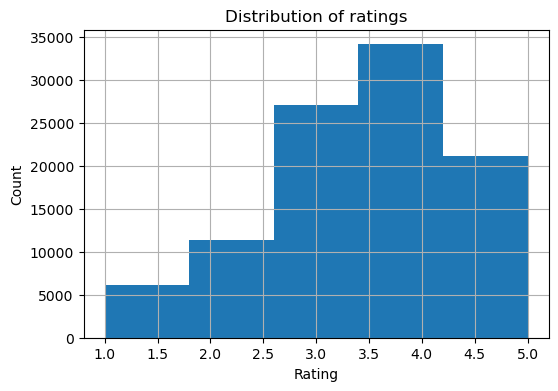

In [26]:
#Rating distribution plot
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
df['rating'].hist(bins=5)
plt.title('Distribution of ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

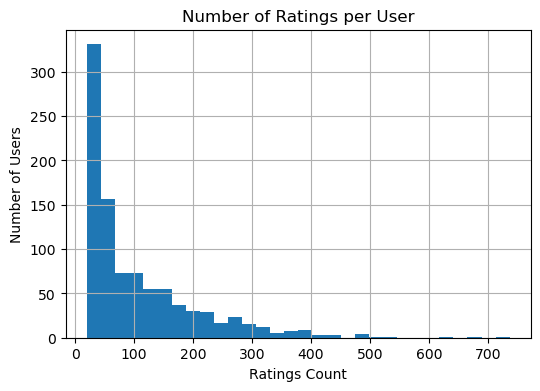

In [30]:
#Number of Ratings per User
user_rating_counts = df.groupby('user_id')['rating'].count()

plt.figure(figsize=(6, 4))
user_rating_counts.hist(bins=30)
plt.title('Number of Ratings per User')
plt.xlabel('Ratings Count')
plt.ylabel('Number of Users')
plt.show()